In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('ecommerce_customer_data.CSV')

In [15]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [17]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [19]:
df.shape

(250000, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [23]:
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [25]:
# Step 1: Calculate the mean return rate for each Product Category and Customer combination
return_prob = (
    df.groupby(['Product Category', 'Customer ID'])['Returns']
    .transform(lambda x: x.mean())
)

# Step 2: Use this return probability to fill missing values in Returns
df['Returns'] = df['Returns'].fillna(return_prob)

# Optional: If there are still missing values, fill with the Product Category average
df['Returns'] = df.groupby('Product Category')['Returns'].transform(lambda x: x.fillna(x.mean()))

In [26]:
df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [23]:
# Check if the columns are identical
are_columns_identical = df['Customer Age'].equals(df['Age'])

if are_columns_identical:
    print("The Customer Age and Age columns are identical.")
else:
    print("The Customer Age and Age columns are not identical.")

The Customer Age and Age columns are identical.


In [29]:
#Since the Customer Age and Age columns are the same. Deleting Age column.

# Drop the Age column
df.drop(columns=['Age'], inplace=True)

In [31]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,Female,0


In [33]:
# 1. Find duplicates based on all columns
duplicates_all = df[df.duplicated(keep=False)]
print("Duplicate rows based on all columns:")
print(duplicates_all)

Duplicate rows based on all columns:
Empty DataFrame
Columns: [Customer ID, Purchase Date, Product Category, Product Price, Quantity, Total Purchase Amount, Payment Method, Customer Age, Returns, Customer Name, Gender, Churn]
Index: []


In [35]:
df.dtypes

Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Gender                    object
Churn                      int64
dtype: object

In [37]:
# Average order value per customer
avg_order_value = df.groupby('Customer ID')['Total Purchase Amount'].mean().rename('Avg Order Value')
df = df.merge(avg_order_value, on='Customer ID')


In [39]:
# Frequency of purchases per customer
purchase_frequency = df.groupby('Customer ID').size().rename('Purchase Frequency')
df = df.merge(purchase_frequency, on='Customer ID')


In [41]:
# Total spend per customer
total_spend = df.groupby('Customer ID')['Total Purchase Amount'].sum().rename('Total Spend')
df = df.merge(total_spend, on='Customer ID')


In [43]:
# Calculate return rate per customer
return_rate = df.groupby('Customer ID')['Returns'].mean().rename('Return Rate')
df = df.merge(return_rate, on='Customer ID')


In [45]:
# Convert Gender to binary (1 for Female, 0 for Male, assuming binary data)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)

# Create age groups (e.g., under 18, 18-25, 26-35, etc.)
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)


In [47]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Avg Order Value,Purchase Frequency,Total Spend,Return Rate,Age Group
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,0,0,2151.0,5,10755,0.8,26-35
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,0,0,2151.0,5,10755,0.8,26-35
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,0,0,2151.0,5,10755,0.8,26-35
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,0,0,2151.0,5,10755,0.8,26-35
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,0,0,2151.0,5,10755,0.8,26-35


In [52]:
data=df.drop(columns=['Customer ID',	'Purchase Date',	'Product Category','Payment Method','Gender','Customer Name',	'Age Group'])

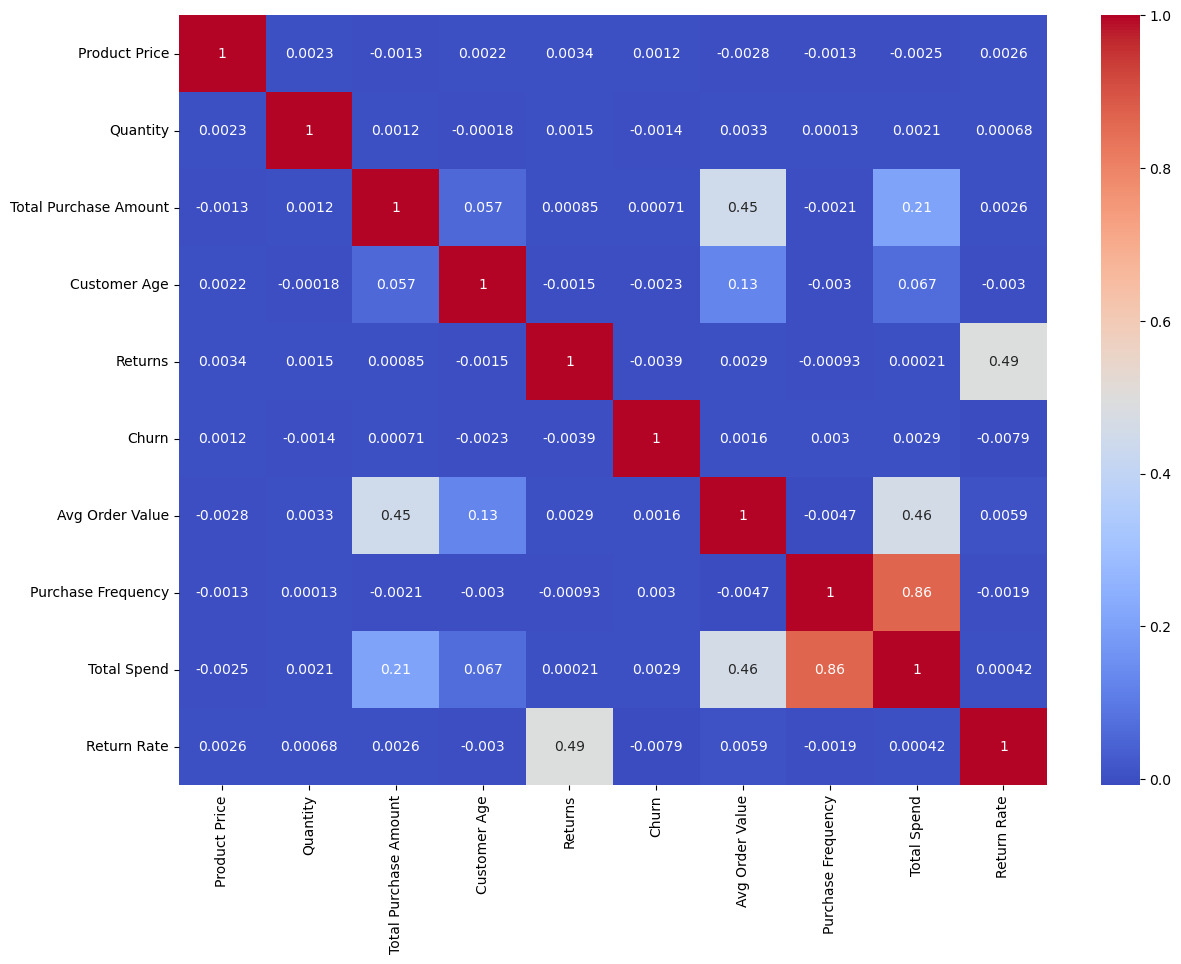

In [54]:
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

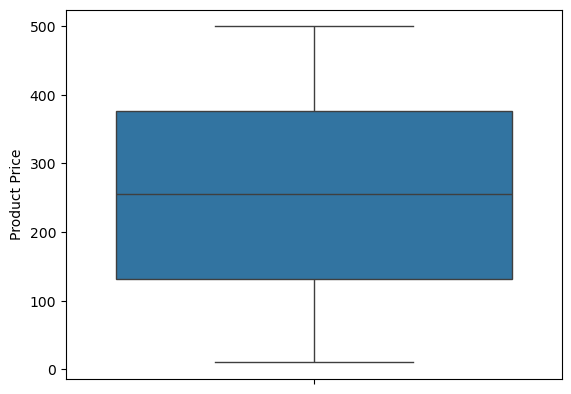

In [56]:
sns.boxplot(data=df, y="Product Price")
plt.show()

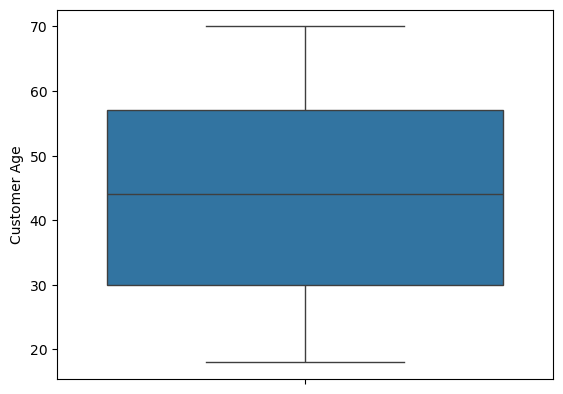

In [58]:
sns.boxplot(data=df, y="Customer Age")
plt.show()

In [60]:
# Calculate the churn rate by age group
churn_rate_by_age_group = df.groupby('Age Group')['Churn'].mean() * 100
print(churn_rate_by_age_group)

Age Group
<18      19.110276
18-25    21.333723
26-35    19.437560
36-45    19.818473
46-55    19.460576
56-65    20.425321
65+      20.519018
Name: Churn, dtype: float64


C:\Users\Manish Dangol\AppData\Local\Temp\ipykernel_1096\1523976215.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_age_group = df.groupby('Age Group')['Churn'].mean() * 100


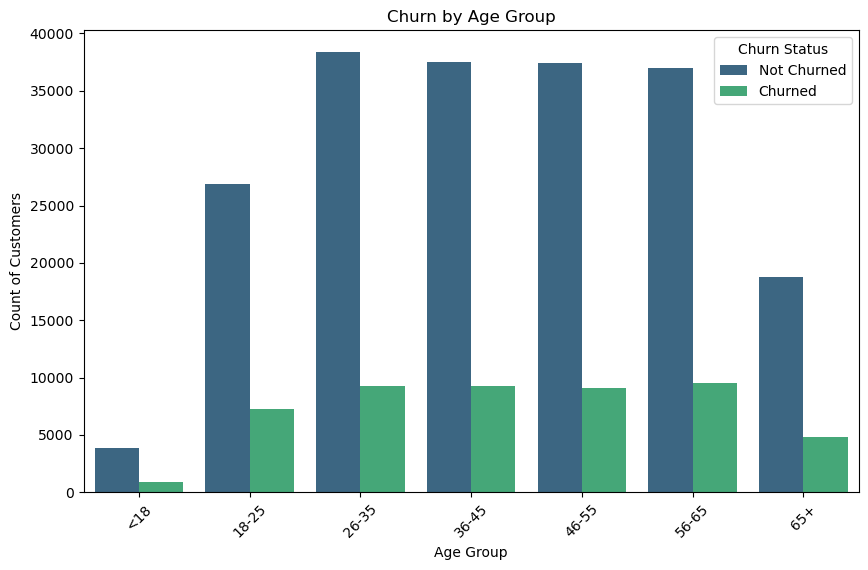

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age Group', hue='Churn', palette='viridis', hue_order=[0, 1])

# Manually update the legend to show "Not Churned" and "Churned"
plt.legend(title="Churn Status", labels=["Not Churned", "Churned"])

# Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Count of Customers")
plt.title("Churn by Age Group")
plt.xticks(rotation=45)
plt.show()

C:\Users\Manish Dangol\AppData\Local\Temp\ipykernel_1096\4159492384.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Return Rate', palette='viridis')


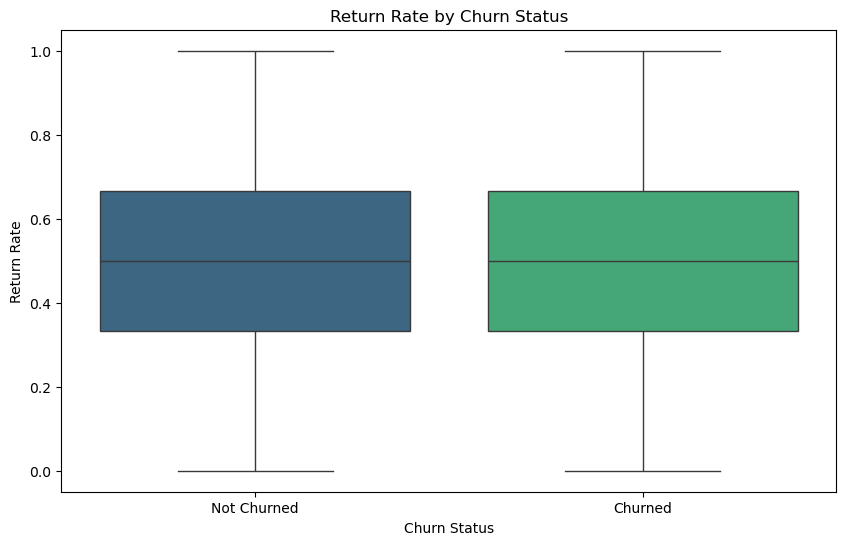

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Return Rate', palette='viridis')

# Change labels in plot without changing data
plt.xticks([0, 1], ["Not Churned", "Churned"])

# Add labels and title
plt.xlabel("Churn Status")
plt.ylabel("Return Rate")
plt.title("Return Rate by Churn Status")
plt.show()

C:\Users\Manish Dangol\AppData\Local\Temp\ipykernel_1096\3735143591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product Category', y='Return Rate', palette='viridis')


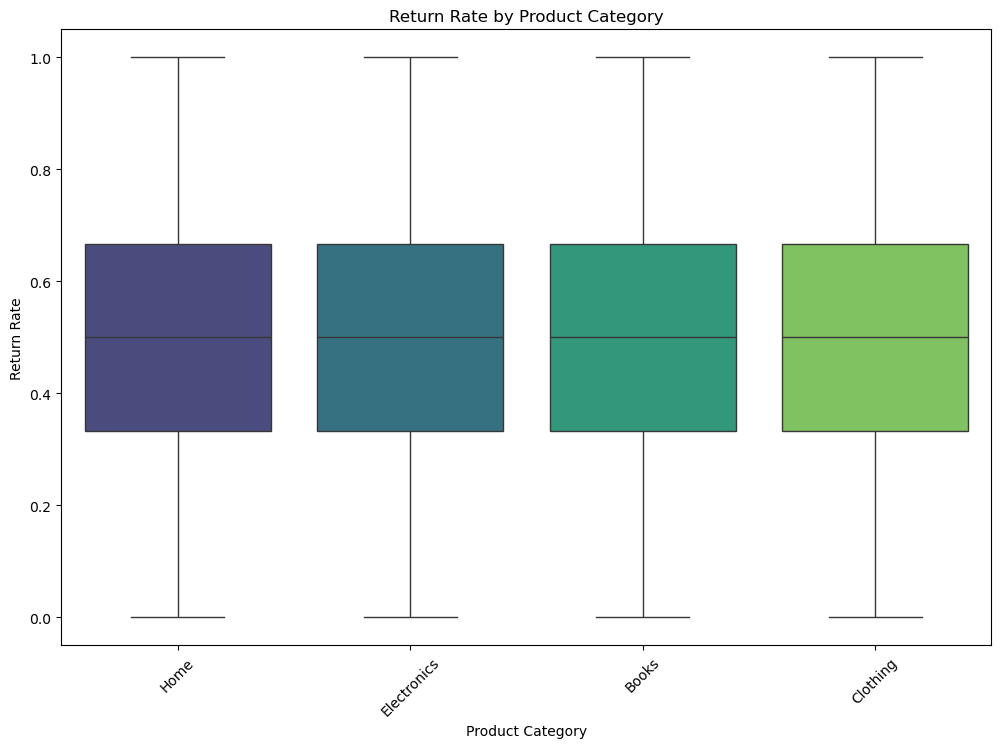

In [64]:
# Box plot for Return Rate by Product Category
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Product Category', y='Return Rate', palette='viridis')

# Add labels and title
plt.xlabel("Product Category")
plt.ylabel("Return Rate")
plt.title("Return Rate by Product Category")
plt.xticks(rotation=45)
plt.show()

C:\Users\Manish Dangol\AppData\Local\Temp\ipykernel_1096\3116710733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age Group', y='Purchase Frequency', palette='viridis')


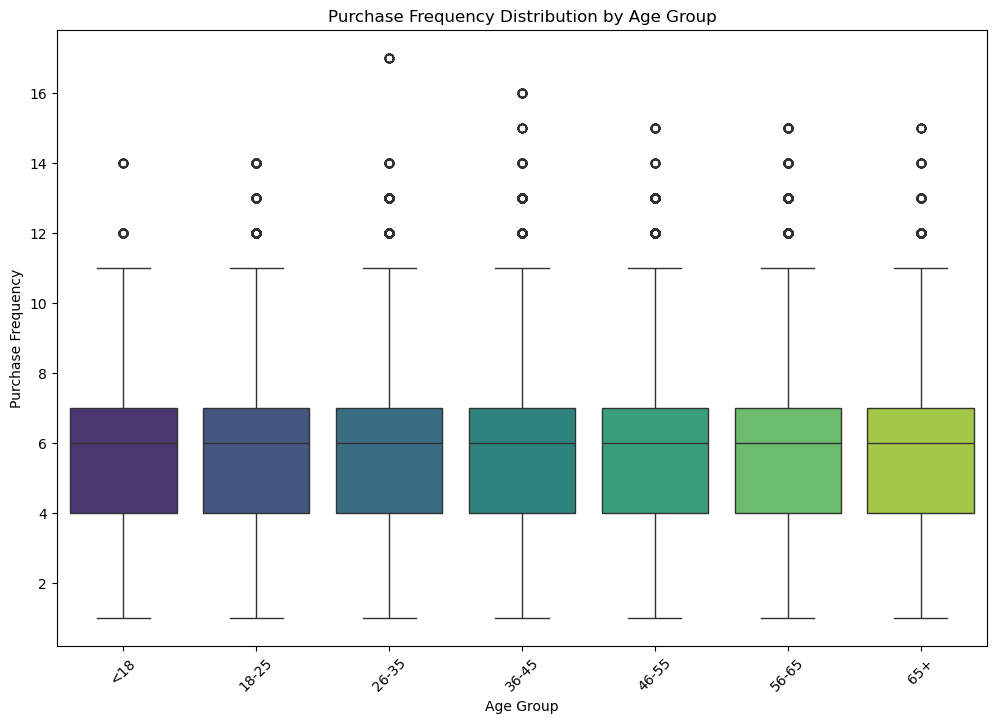

In [66]:
# Box plot for Purchase Frequency by Age Group
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Age Group', y='Purchase Frequency', palette='viridis')

# Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Purchase Frequency")
plt.title("Purchase Frequency Distribution by Age Group")
plt.xticks(rotation=45)
plt.show()

In [70]:
purchase_frequency_distribution = df.groupby('Age Group')['Purchase Frequency'].describe()
print(purchase_frequency_distribution)

             count      mean       std  min  25%  50%  75%   max
Age Group                                                       
<18         4788.0  5.993317  2.288096  1.0  4.0  6.0  7.0  14.0
18-25      34190.0  6.038374  2.259300  1.0  4.0  6.0  7.0  14.0
26-35      47614.0  5.977528  2.204659  1.0  4.0  6.0  7.0  17.0
36-45      46825.0  5.986054  2.235399  1.0  4.0  6.0  7.0  16.0
46-55      46494.0  5.992386  2.229316  1.0  4.0  6.0  7.0  15.0
56-65      46506.0  5.996689  2.261277  1.0  4.0  6.0  7.0  15.0
65+        23583.0  5.987576  2.218145  1.0  4.0  6.0  7.0  15.0


C:\Users\Manish Dangol\AppData\Local\Temp\ipykernel_1096\1533363029.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_frequency_distribution = df.groupby('Age Group')['Purchase Frequency'].describe()


In [72]:
df['Payment Method'].unique()

array(['PayPal', 'Credit Card', 'Cash'], dtype=object)

In [74]:
df['Product Category'].unique()

array(['Home', 'Electronics', 'Books', 'Clothing'], dtype=object)

In [76]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder for each column
encoder_payment = OneHotEncoder(sparse_output=False, drop='first')  # for Payment Method
encoder_product = OneHotEncoder(sparse_output=False, drop='first')  # for Product Category

# One-Hot Encoding for Payment Method
payment_encoded = encoder_payment.fit_transform(df[['Payment Method']])

# One-Hot Encoding for Product Category
product_encoded = encoder_product.fit_transform(df[['Product Category']])

# Convert the result to DataFrames for easier readability
encoded_payment_df = pd.DataFrame(payment_encoded, columns=encoder_payment.get_feature_names_out(['Payment Method']))
encoded_product_df = pd.DataFrame(product_encoded, columns=encoder_product.get_feature_names_out(['Product Category']))

# Concatenate with the original DataFrame (excluding 'Payment Method' and 'Product Category' columns)
df_encoded = pd.concat([df.drop(columns=['Payment Method', 'Product Category']), 
                        encoded_payment_df, 
                        encoded_product_df], axis=1)



In [78]:
df_encoded.head()

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Customer Name,Gender,Churn,Avg Order Value,Purchase Frequency,Total Spend,Return Rate,Age Group,Payment Method_Credit Card,Payment Method_PayPal,Product Category_Clothing,Product Category_Electronics,Product Category_Home
0,44605,2023-05-03 21:30:02,177,1,2427,31,1.0,John Rivera,0,0,2151.0,5,10755,0.8,26-35,0.0,1.0,0.0,0.0,1.0
1,44605,2021-05-16 13:57:44,174,3,2448,31,1.0,John Rivera,0,0,2151.0,5,10755,0.8,26-35,0.0,1.0,0.0,1.0,0.0
2,44605,2020-07-13 06:16:57,413,1,2345,31,1.0,John Rivera,0,0,2151.0,5,10755,0.8,26-35,1.0,0.0,0.0,0.0,0.0
3,44605,2023-01-17 13:14:36,396,3,937,31,0.0,John Rivera,0,0,2151.0,5,10755,0.8,26-35,0.0,0.0,0.0,1.0,0.0
4,44605,2021-05-01 11:29:27,259,4,2598,31,1.0,John Rivera,0,0,2151.0,5,10755,0.8,26-35,0.0,1.0,0.0,0.0,0.0


In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [84]:
X = df_encoded.drop(columns=['Churn', 'Customer ID', 'Customer Name', 'Purchase Date','Age Group'])  # Drop irrelevant columns
y = df_encoded['Churn']

In [86]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.49928
              precision    recall  f1-score   support

           0       0.80      0.49      0.61     40016
           1       0.20      0.52      0.29      9984

    accuracy                           0.50     50000
   macro avg       0.50      0.51      0.45     50000
weighted avg       0.68      0.50      0.55     50000



In [127]:
# Decision Tree with Hyperparameter Tuning
tree_params = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 10, 20]}
tree = DecisionTreeClassifier(random_state=42,class_weight='balanced')
tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X_train_scaled, y_train)
best_tree = tree_grid.best_estimator_
y_pred_tree = best_tree.predict(X_test_scaled)
print("Best Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Best Decision Tree Accuracy: 0.31406
              precision    recall  f1-score   support

           0       0.91      0.16      0.27     40016
           1       0.22      0.94      0.35      9984

    accuracy                           0.31     50000
   macro avg       0.56      0.55      0.31     50000
weighted avg       0.77      0.31      0.29     50000



In [98]:
# Random Forest with Hyperparameter Tuning
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
rf = RandomForestClassifier(random_state=42,class_weight='balanced')
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_scaled, y_train)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Best Random Forest Accuracy: 0.72388
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40016
           1       0.32      0.34      0.33      9984

    accuracy                           0.72     50000
   macro avg       0.58      0.58      0.58     50000
weighted avg       0.73      0.72      0.73     50000



In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Logistic Regression Evaluation
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)

print("Logistic Regression Evaluation:")
print(f"Accuracy: {log_reg_accuracy:.2f}")
print(f"Precision: {log_reg_precision:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"F1-Score: {log_reg_f1:.2f}")
print(classification_report(y_test, y_pred_log_reg))

# Decision Tree Evaluation
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree)
tree_recall = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)

print("\nDecision Tree Evaluation:")
print(f"Accuracy: {tree_accuracy:.2f}")
print(f"Precision: {tree_precision:.2f}")
print(f"Recall: {tree_recall:.2f}")
print(f"F1-Score: {tree_f1:.2f}")
print(classification_report(y_test, y_pred_tree))

# Random Forest Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Evaluation:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-Score: {rf_f1:.2f}")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Evaluation:
Accuracy: 0.50
Precision: 0.20
Recall: 0.52
F1-Score: 0.29
              precision    recall  f1-score   support

           0       0.80      0.49      0.61     40016
           1       0.20      0.52      0.29      9984

    accuracy                           0.50     50000
   macro avg       0.50      0.51      0.45     50000
weighted avg       0.68      0.50      0.55     50000



NameError: name 'y_pred_tree' is not defined

In [90]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    scale_pos_weight=1,  # Adjust for class imbalance (change based on your data)
    eval_metric="mlogloss",  # Use log loss for multi-class classification (you can change to 'logloss' for binary)
    use_label_encoder=False,  # To avoid deprecation warning
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Predict probabilities (for ROC-AUC)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print(classification_report(y_test, y_pred))

C:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.81412
ROC-AUC: 0.7297858263044943
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     40016
           1       0.95      0.07      0.13      9984

    accuracy                           0.81     50000
   macro avg       0.88      0.54      0.52     50000
weighted avg       0.84      0.81      0.74     50000



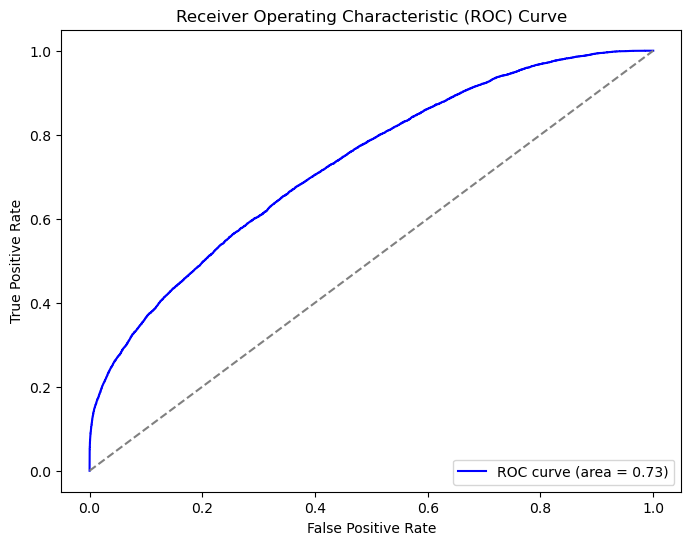

ROC-AUC Score: 0.7297858263044943


In [96]:
# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output the ROC-AUC score
print("ROC-AUC Score:", roc_auc)